## IMPORT LIBRARIES

In [249]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

import warnings
warnings.filterwarnings("ignore")

## GETTING KNOW ABOUT THE DATA SET

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
df.shape

(1599, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## DATA ANALYSIS

> ### CENTRAL TENDENCY

In [41]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

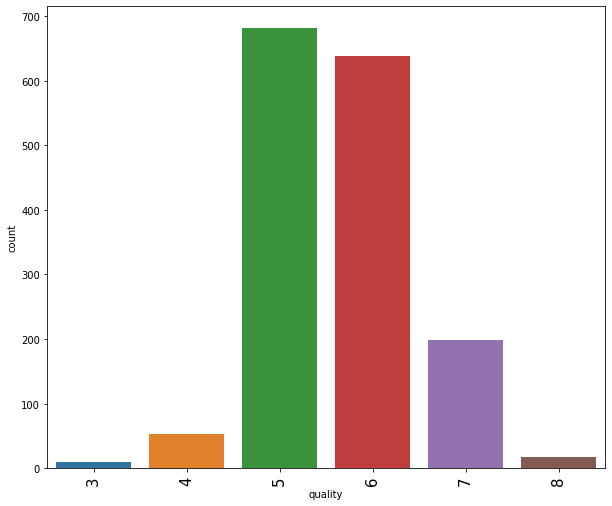

In [16]:
plt.figure(figsize=(10,8.5))
sns.countplot(df['quality'])
plt.xticks(rotation='vertical',size=15)
plt.show()

>### CORRELATION BETWEEN EACH FEATURES

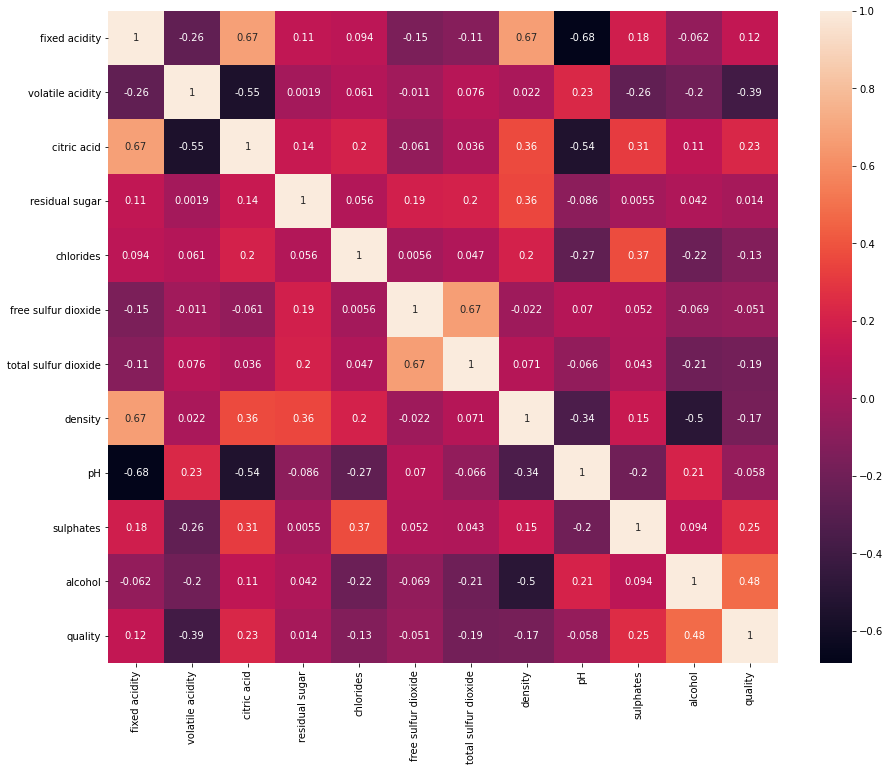

In [42]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

>### CHECKING OUTLIERS FOR EACH VARIABLE

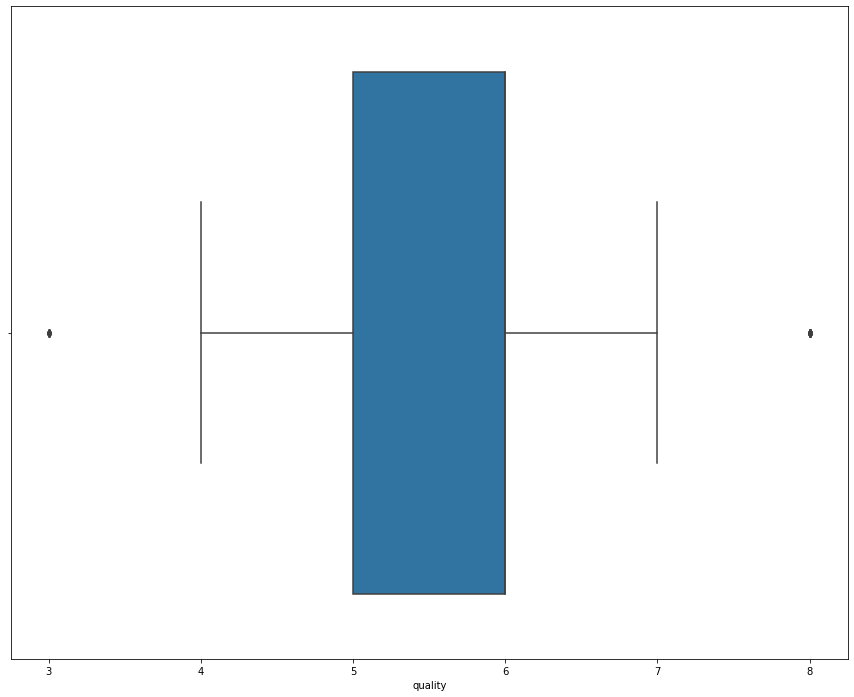

In [25]:
plt.figure(figsize=(15,12))
sns.boxplot(x=df['quality'],data=df)
plt.show()

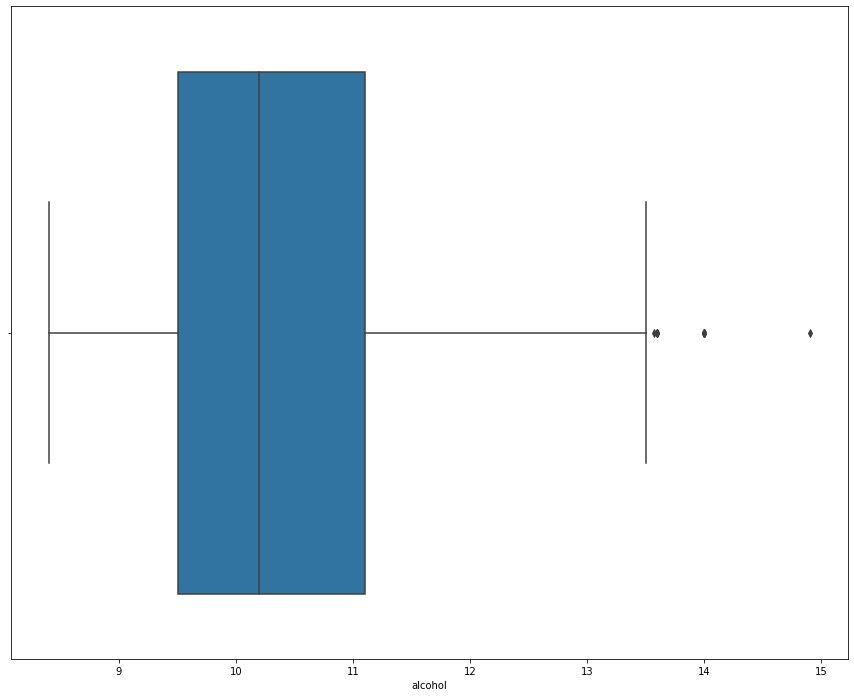

In [27]:
plt.figure(figsize=(15,12))
sns.boxplot(x=df['alcohol'],data=df)
plt.show()

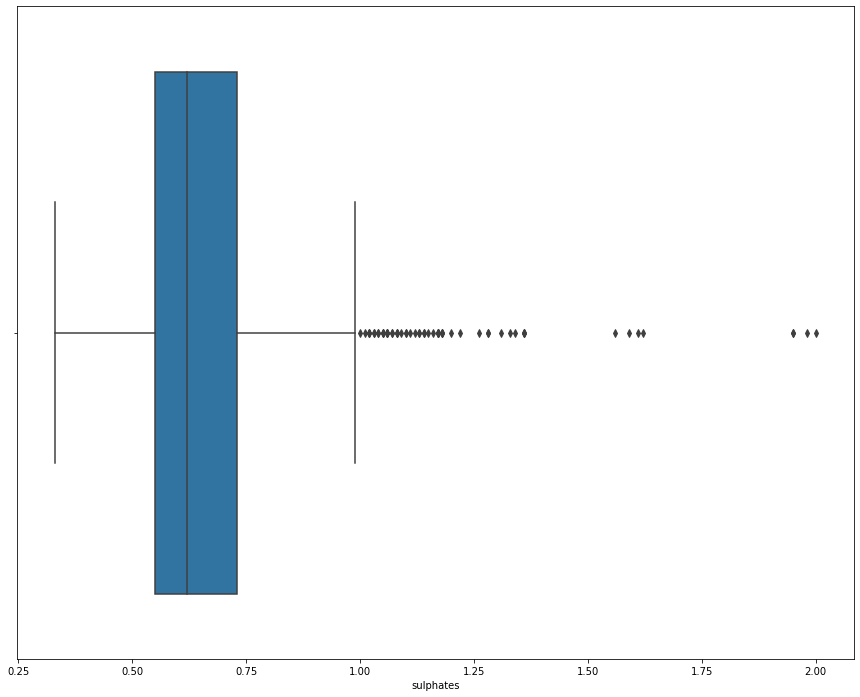

In [29]:
plt.figure(figsize=(15,12))
sns.boxplot(x=df['sulphates'],data=df)
plt.show()

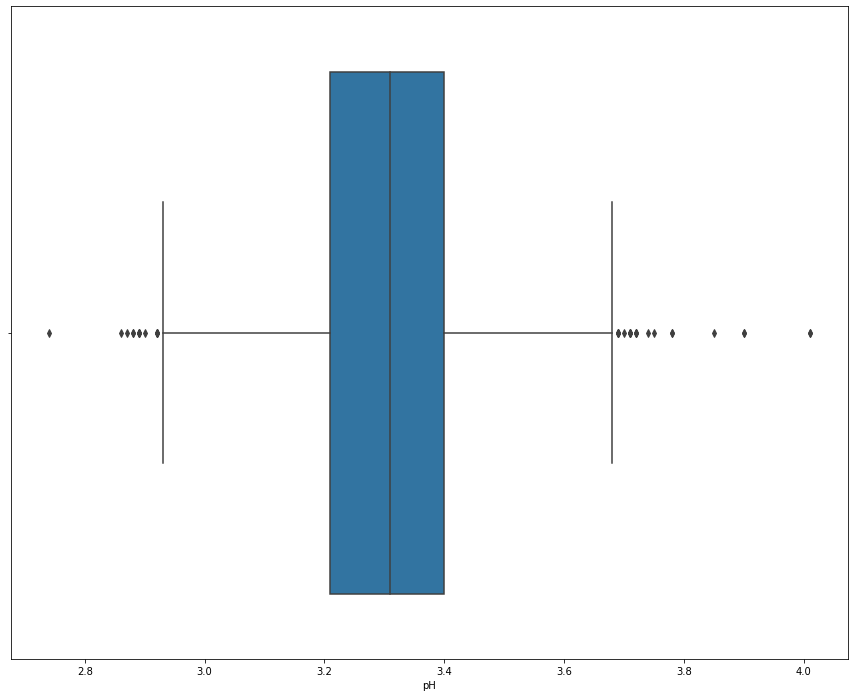

In [30]:
plt.figure(figsize=(15,12))
sns.boxplot(x=df['pH'],data=df)
plt.show()

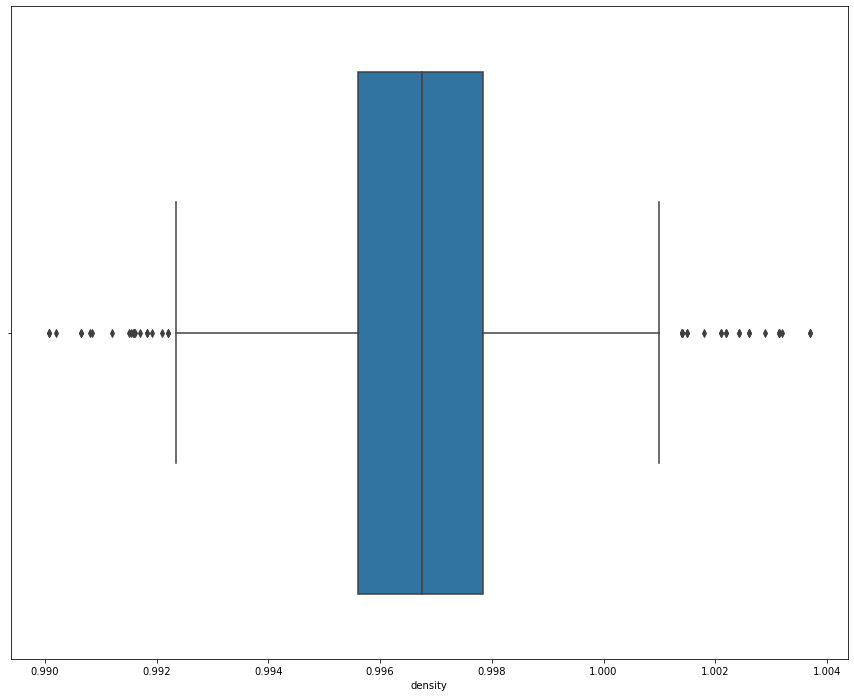

In [31]:
plt.figure(figsize=(15,12))
sns.boxplot(x=df['density'],data=df)
plt.show()

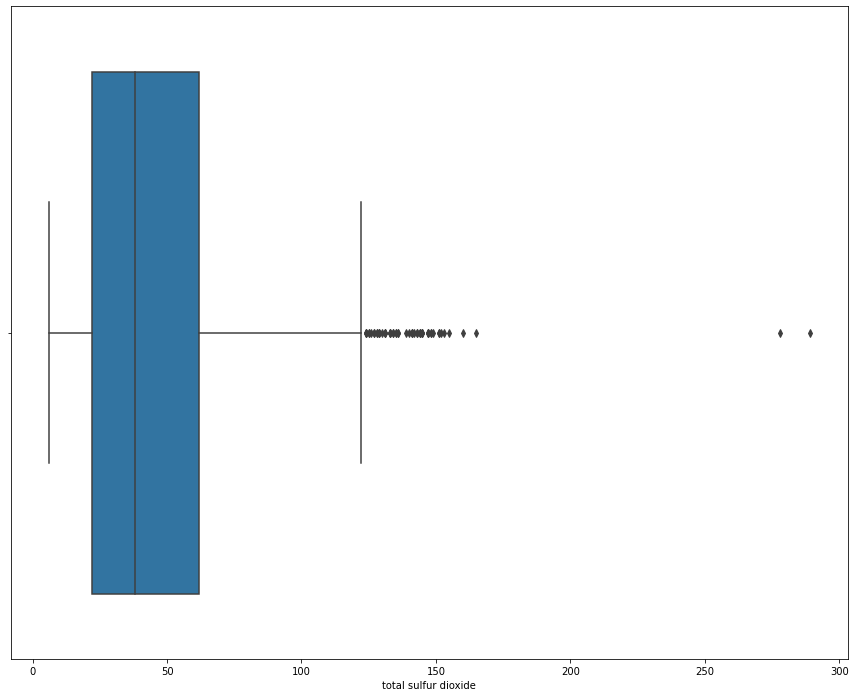

In [32]:
plt.figure(figsize=(15,12))
sns.boxplot(x=df['total sulfur dioxide'],data=df)
plt.show()

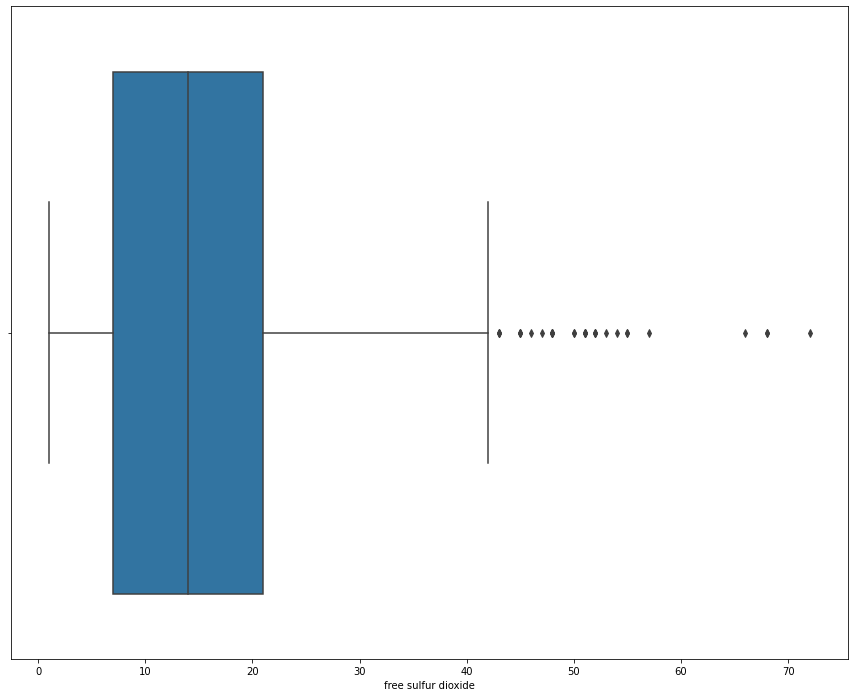

In [33]:
plt.figure(figsize=(15,12))
sns.boxplot(x=df['free sulfur dioxide'],data=df)
plt.show()

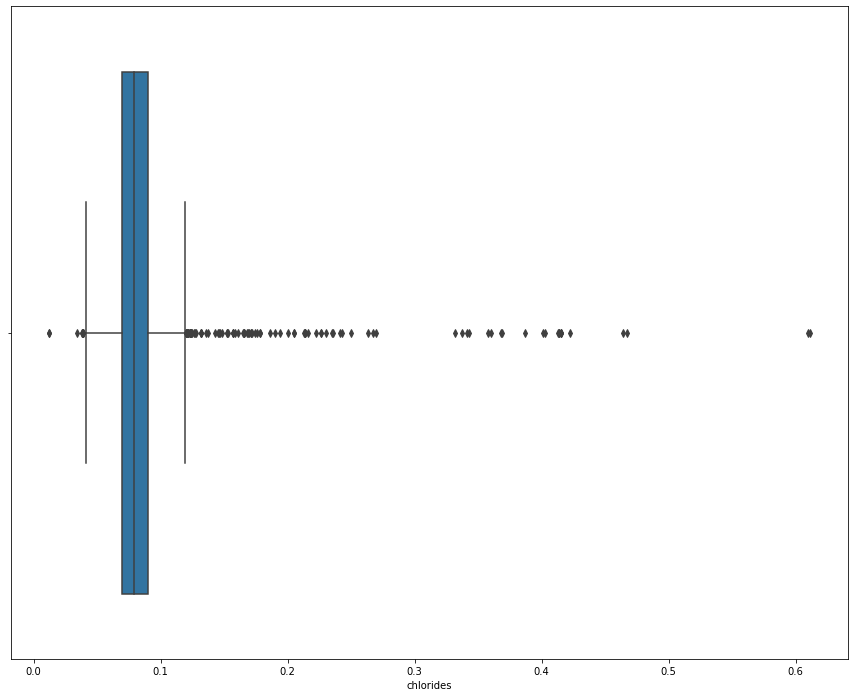

In [34]:
plt.figure(figsize=(15,12))
sns.boxplot(x=df['chlorides'],data=df)
plt.show()

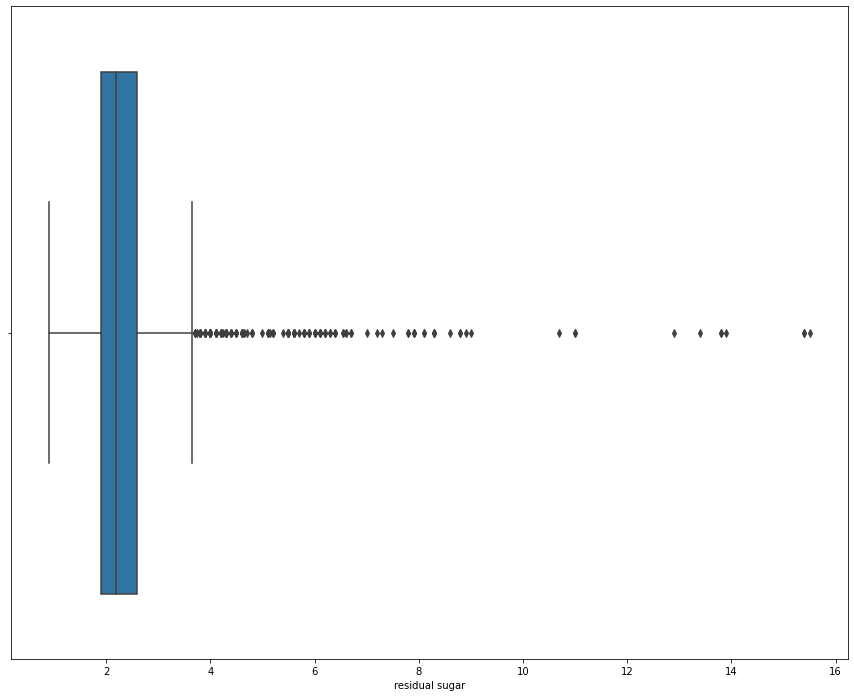

In [35]:
plt.figure(figsize=(15,12))
sns.boxplot(x=df['residual sugar'],data=df)
plt.show()

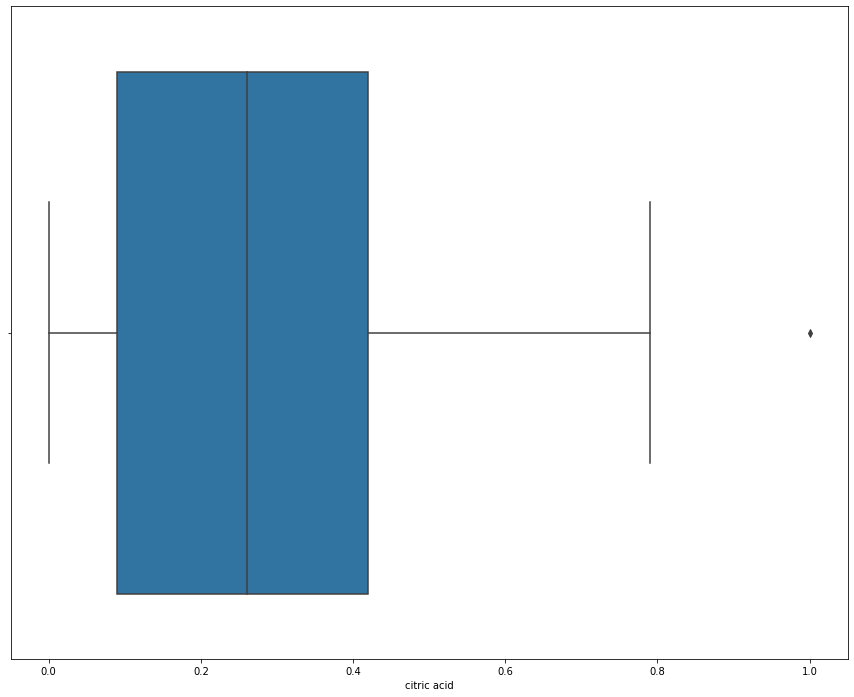

In [36]:
plt.figure(figsize=(15,12))
sns.boxplot(x=df['citric acid'],data=df)
plt.show()

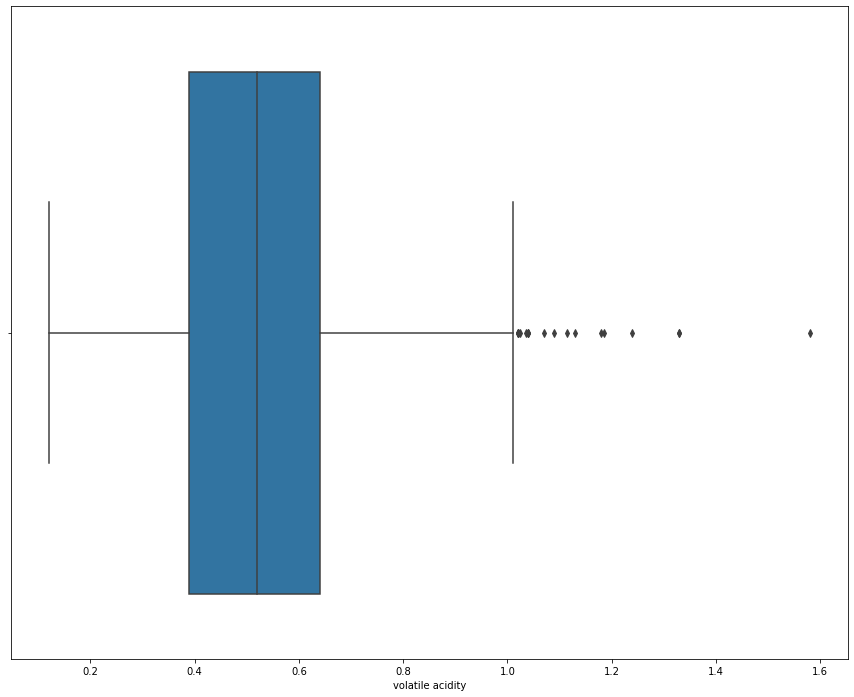

In [37]:
plt.figure(figsize=(15,12))
sns.boxplot(x=df['volatile acidity'],data=df)
plt.show()

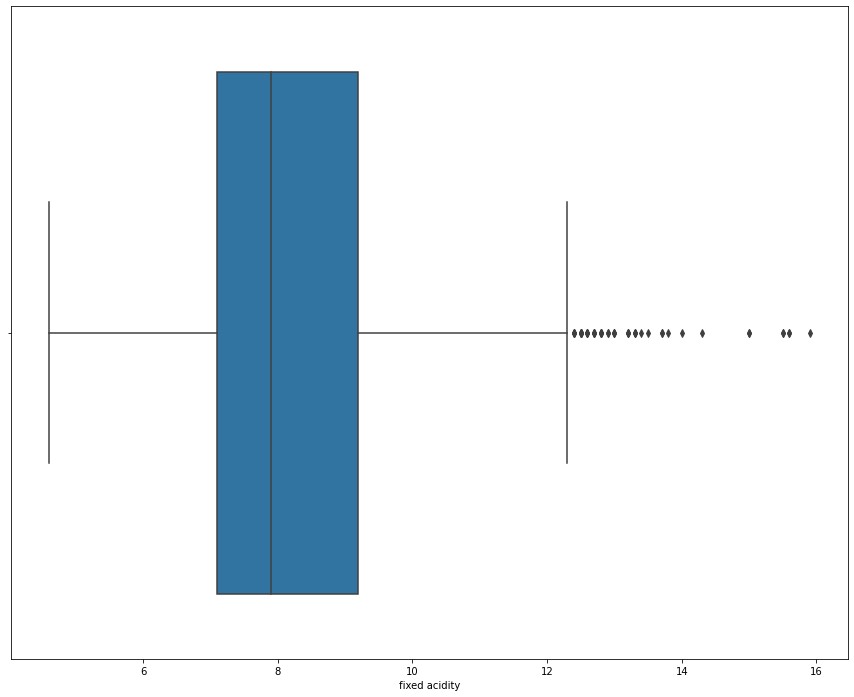

In [38]:
plt.figure(figsize=(15,12))
sns.boxplot(x=df['fixed acidity'],data=df)
plt.show()

>### FEATURES DISTRIBUTION TO EACH OTHER

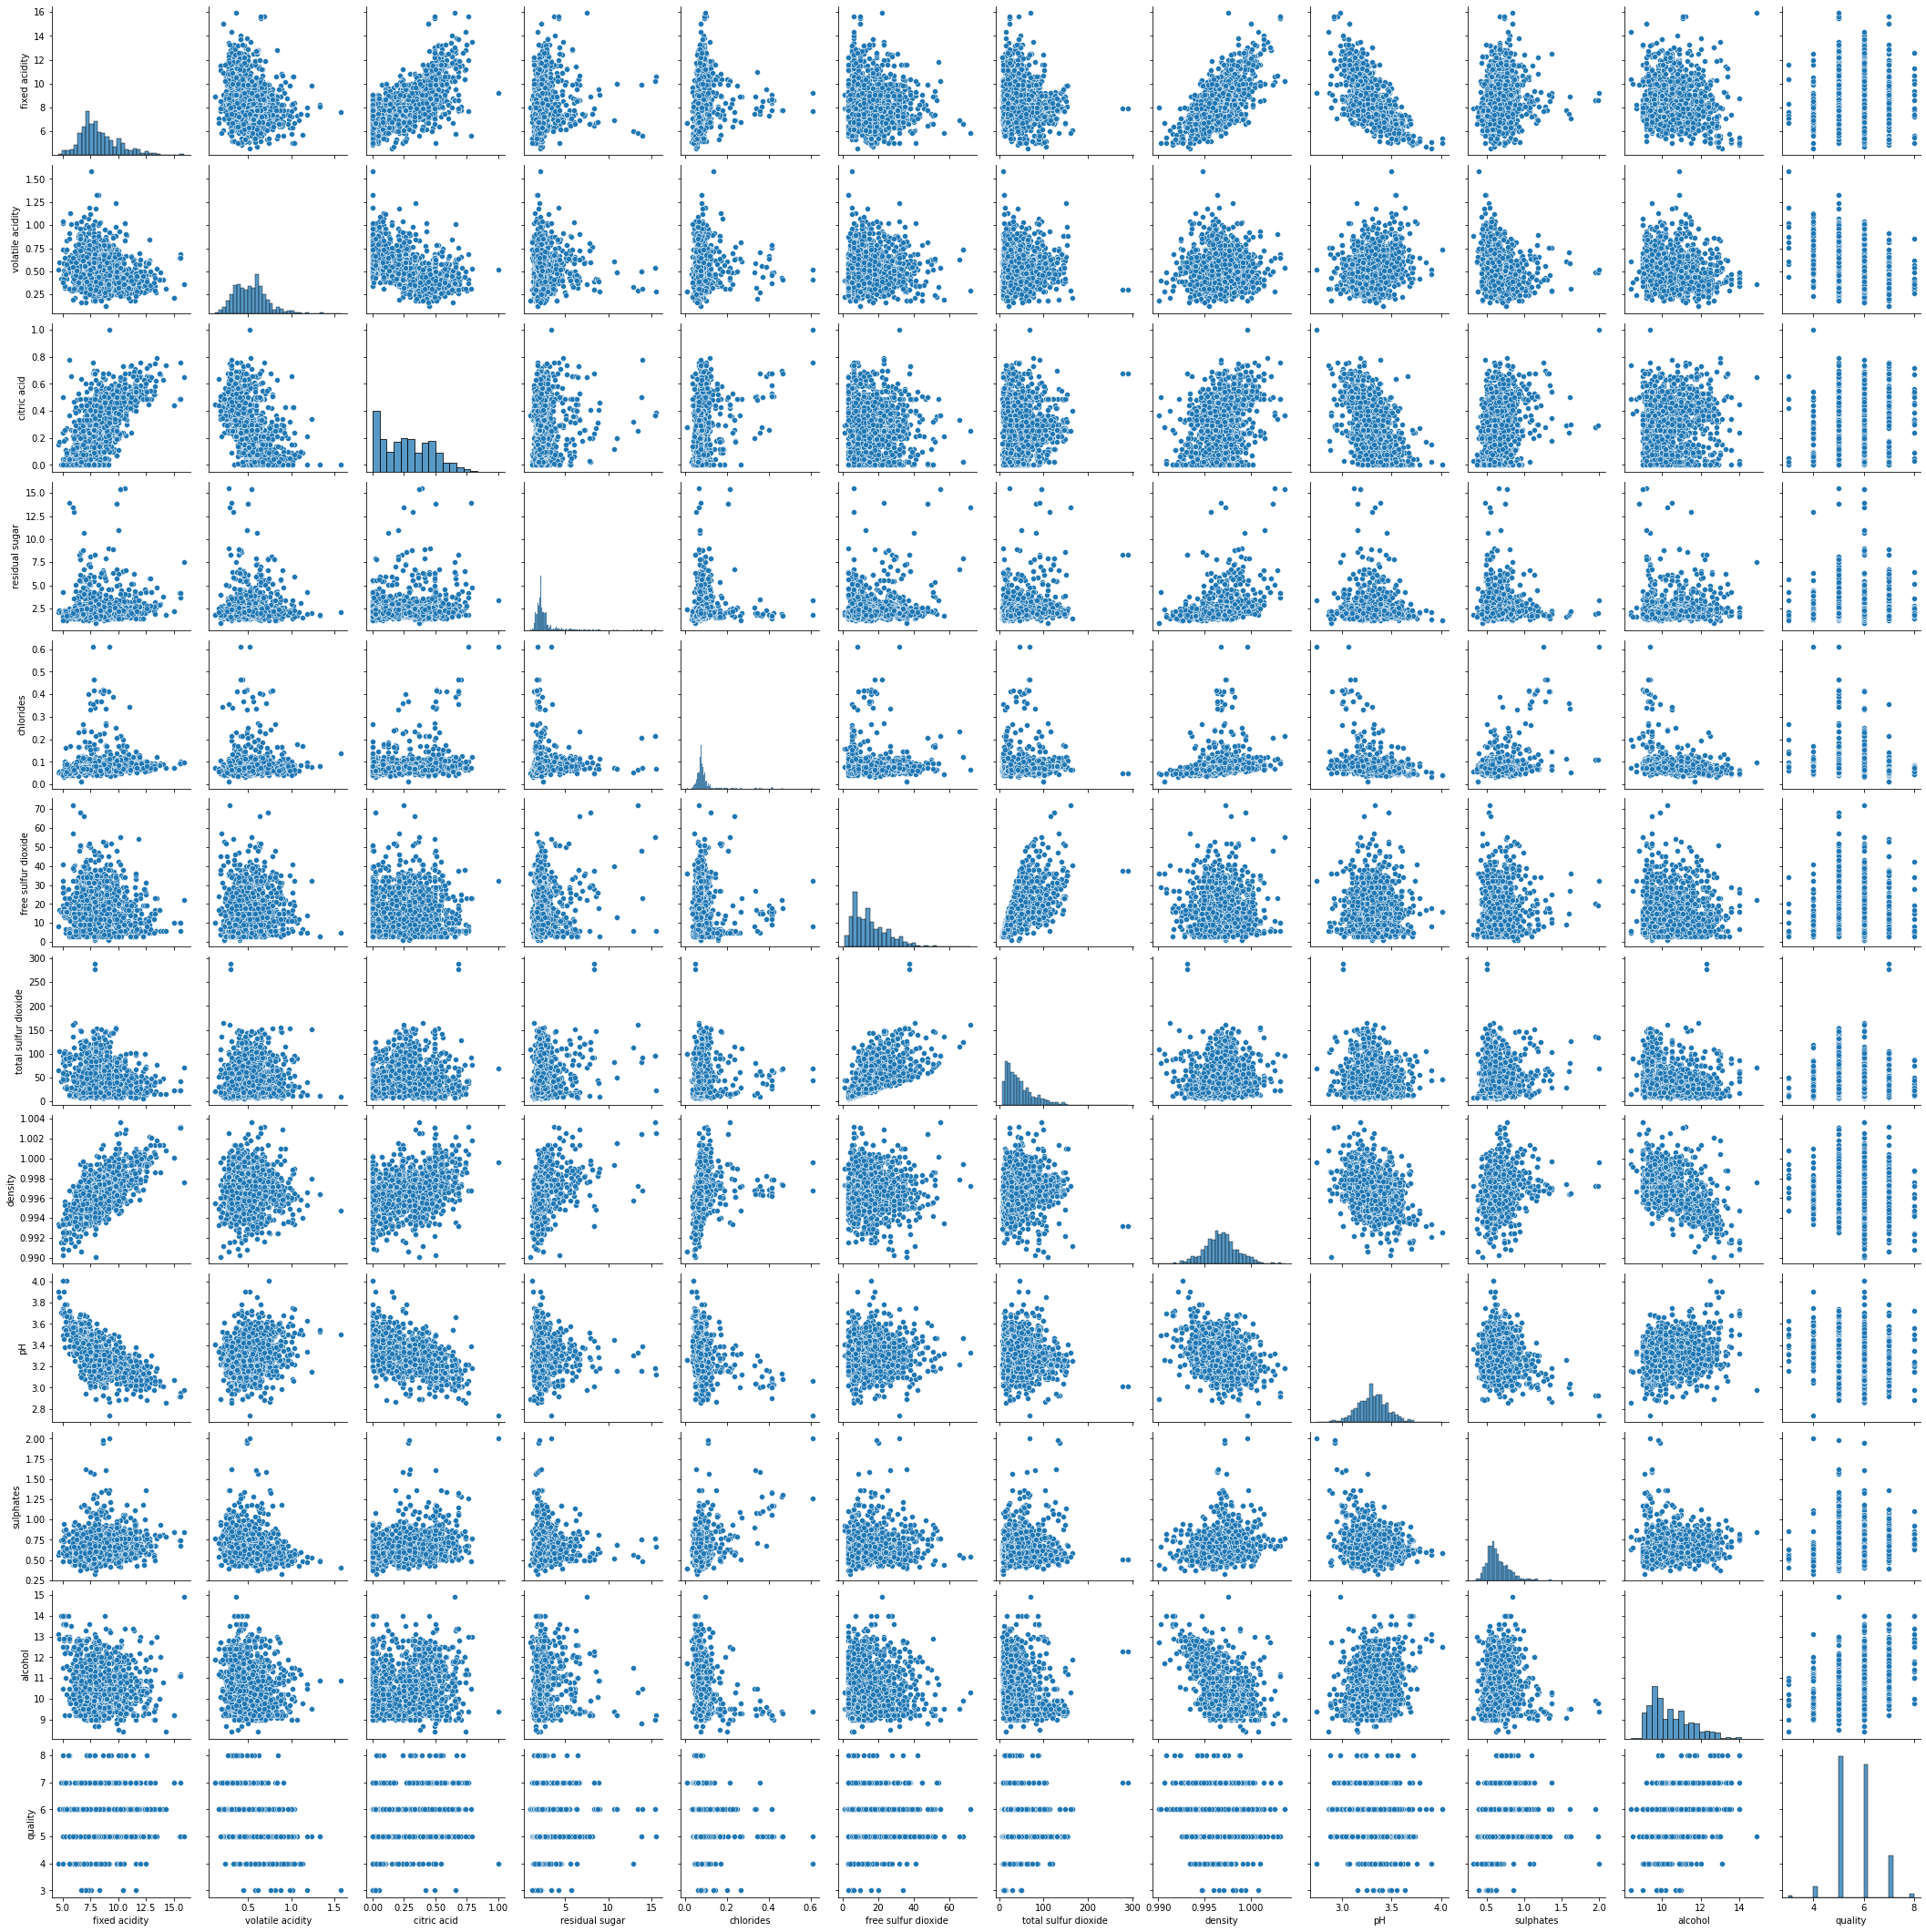

In [26]:
sns.pairplot(df)

## MODEL BULDING

### PRE PROCCESSING

In [43]:
x = df.drop(['quality'],axis=1)
y = df['quality']

In [46]:
from imblearn.over_sampling import SMOTE

In [51]:
os=SMOTE()
x_res,y_res = os.fit_resample(x,y)

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x_res,y_res, test_size=0.2, random_state=0)

In [54]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### DECISION TREE CLASSIFIER

In [79]:
model = DecisionTreeClassifier(random_state=0,criterion='entropy',max_depth=None)

In [80]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [81]:
pred = model.predict(x_test)

In [82]:
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
df_predict.head(10)

,Actual,Predicted
3226,7,7
2226,3,3
2506,4,4
1947,3,3
3238,7,8
3540,8,8
3790,8,8
735,5,5
3754,8,8
979,5,5


> ### MODEL EVALUATION

In [83]:
acc_per = accuracy_score(y_test,pred)

In [84]:
print('Model Accuracy : '+ str(round(acc_per*100))+'%')

Model Accuracy : 79%


### RANDOM FOREST CLASSIFIER

In [229]:
model2 = RandomForestClassifier(n_estimators=120,random_state=0)

In [230]:
model2.fit(x_train,y_train)

RandomForestClassifier(n_estimators=120, random_state=0)

In [231]:
pred2 = model2.predict(x_test)

In [232]:
df_predict2 = pd.DataFrame({'Actual': y_test, 'Predicted': pred2})
df_predict2.head(10)

,Actual,Predicted
3226,7,7
2226,3,3
2506,4,4
1947,3,3
3238,7,7
3540,8,8
3790,8,8
735,5,5
3754,8,8
979,5,5


> ### MODEL EVALUATION

In [244]:
acc_per2 = accuracy_score(y_test,pred2)

In [245]:
print('Model Accuracy : '+ str(round(acc_per2*100,4)))

Model Accuracy : 86.7971


In [252]:
cross_validation = cross_val_score(model2,x_res,y_res,cv=5)
print('Cross validations mean score ',round(np.mean(cross_validation)*100,4))

Cross validations mean score  80.9103


In [238]:
print("Recall Score :",recall_score(y_test, pred2, average='weighted'))
print("Percision Score :",precision_score(y_test, pred2, average='weighted'))
print("F1 Score :",f1_score(y_test, pred2, average='weighted'))

Recall Score : 0.8679706601466992
Percision Score : 0.8613716833911634
F1 Score : 0.8626370599386749


### EXTRA TREES CLASSIFIER

In [289]:
model3 = ExtraTreesClassifier(n_estimators=124,random_state=0)
model3.fit(x_train,y_train)

ExtraTreesClassifier(n_estimators=124, random_state=0)

In [290]:
pred3 = model3.predict(x_test)

In [291]:
df_predict3 = pd.DataFrame({'Actual': y_test, 'Predicted': pred3})
df_predict3.head(10)

,Actual,Predicted
3226,7,7
2226,3,3
2506,4,4
1947,3,3
3238,7,7
3540,8,8
3790,8,8
735,5,5
3754,8,8
979,5,5


> ### MODEL EVALUATION

In [292]:
acc_per3 = accuracy_score(y_test,pred3)
print('Model Accuracy : '+ str(round(acc_per3*100,4)))

Model Accuracy : 87.8973


In [293]:
cross_validation2 = cross_val_score(model3,x_res,y_res,cv=5)
print('Cross validations mean score ',round(np.mean(cross_validation2)*100,4))

Cross validations mean score  82.0115


# CONCLUSION

>According to the above results Extra Tress Classifier modle has the highest accuracy (88%) & Cross validation mean score (82%)